## 1.1.1 Пример
> Проведем прямую y = mx + b через экспериментальные точки.

In [88]:
import numpy as np

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [89]:
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

0.9999999999999997 -0.9499999999999992


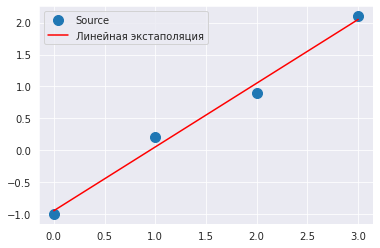

In [90]:
import matplotlib.pyplot as plt

plt.plot(x, y, 'o', label='Source', markersize=10)
plt.plot(x, m*x+c, 'r', label='Линейная экстаполяция')

plt.legend()
plt.show()

## 1.1.2 Пример
> Пусть x, y – вектора длиной n > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты поринома a, b, c по методу
наименьших квадратов. Данные мтогут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.

In [91]:
from numpy import *
from numpy.random import *

#генерируем случайные х и у
delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

#записывае данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

In [92]:
# читаем данные из файлов
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

[-5.25467084 -4.16157316 -3.40777715 -2.08316384 -0.70411988 -0.15344116
  1.09250928  1.86138258  3.14003165  4.48926529  4.54026471]
[24.66242081 16.03807777  8.98756989  4.4790796   1.17059577  0.47095664
  1.35372113  3.80549327  8.64594617 16.25376519 25.46183157]


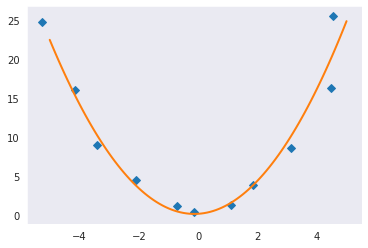

In [93]:
# Нахождение коэффициентов функции вида у = ax 2 + bx + с методом наименьших квадратов
# задаем вектор т = [x**2, х, E]
m = vstack((x**2, x, ones(11))).T

# находим коэффициенты при составляющих вектора т
s = linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)

# рисуем точки
plt.plot(x, y, 'D')

# рисуем кривую вида у = ax*2 + bx + с, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2],"-", lw=2)
plt.grid()
plt.savefig('парабола.png')

## 1.1.3 Пример
> По данным предыдущего примера постройте эстраполяционного полинома
третьего порядка

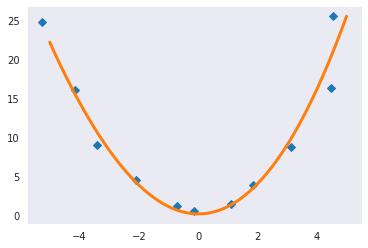

In [94]:
#Решение
# Нахождение коэффициентов функции вида у = ax*3 + bx*2 + c х + d методом наименьших квадратов
# # задаем вектор м = [x**3, x, E]
m = vstack((x**3, x**2, x, ones(11))).T
# находим коэффициенты при составляющих вектора т
s = linalg.lstsq(m, y, rcond = None)[0]
# на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)
# рисуем точки
plt.plot(x, y, 'D')
# рисуем кривую вида у ax*3 + bx*2 + cx + d, подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3],'-', lw = 3)
plt.grid()
plt.savefig("полином 3-й степени.png")

## 1.1.1 Задание
> Представьте собственные данные и постройте эктраполяцию полиномамипервой, второй и третьей степени.

In [95]:
#генерируем случайные х и у
delta = 0.87
x = linspace(-2,22,18)
y = x**2+delta*(rand(18)-1.7)
x += delta*(rand(18)-1.7)

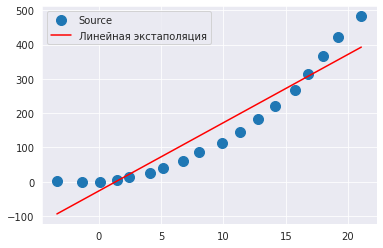

In [96]:
m = vstack([x, np.ones(18)]).T
m, c = np.linalg.lstsq(m, y, rcond = None)[0]

plt.plot(x, y, 'o', label='Source', markersize=10)
plt.plot(x, m*x+c, 'r', label='Линейная экстаполяция')

plt.legend()
plt.show()

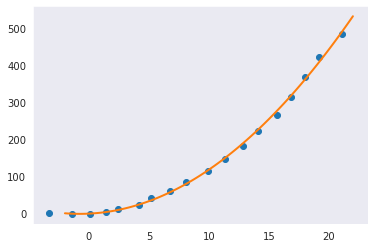

In [97]:
# Нахождение коэффициентов функции вида у = ax 2 + bx + с методом наименьших квадратов
# задаем вектор т = [x**2, х, E]
m = vstack((x**2, x, ones(18))).T

# находим коэффициенты при составляющих вектора т
s = linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5,5]
x_prec = linspace(-2, 22, 101)

# рисуем точки
plt.plot(x, y, 'o')

# рисуем кривую вида у = ax*2 + bx + с, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2],"-", lw=2)
plt. grid()

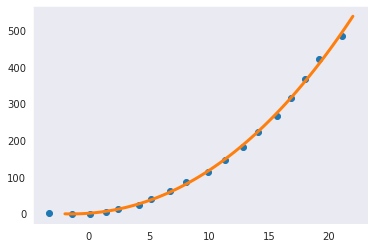

In [98]:
#Решение
# Нахождение коэффициентов функции вида у = ax*3 + bx*2 + c х + d методом наименьших квадратов
# # задаем вектор м = [x**3, x, E]
m = vstack((x**3, x**2, x, ones(18))).T
# находим коэффициенты при составляющих вектора т
s = linalg.lstsq(m, y, rcond = None)[0]
# на отрезке [-5,5]
x_prec = linspace(-2, 22, 101)
# рисуем точки
plt.plot(x, y, 'o')
# рисуем кривую вида у ax*3 + bx*2 + cx + d, подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3],'-', lw = 3)
plt.grid()

## 1.1.4 Пример
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривую вида f(x, b) = b_0 + b_1*exp(−b*2*x^2)

In [99]:
import numpy as np

#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b - (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)
# зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# # создаем теоретически правильные значения точек уі (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.random(len(xdata))
ydata, xdata

(array([1.04049074, 1.0072078 , 1.00594578, 1.00508425, 0.9456769 ,
        0.95437038, 0.9192792 , 0.87502383, 0.83089162, 0.75896599,
        0.73821841, 0.68903834, 0.64827098, 0.59359803, 0.56467127,
        0.50783309, 0.47070358, 0.44955084, 0.3934937 , 0.40859038,
        0.36478586, 0.366088  , 0.33755565, 0.33438101, 0.32007932,
        0.28581081, 0.28765418, 0.29505565, 0.31075943, 0.30119024,
        0.26730148, 0.28844922, 0.28055434, 0.26581044, 0.28360419,
        0.29238599, 0.28013994, 0.28020917, 0.25906654, 0.29478755,
        0.2916962 , 0.26664301, 0.29732742, 0.2785248 , 0.29010084,
        0.28324823, 0.26364671, 0.2695366 , 0.2500416 , 0.27409955]),
 array([0.        , 0.10204082, 0.20408163, 0.30612245, 0.40816327,
        0.51020408, 0.6122449 , 0.71428571, 0.81632653, 0.91836735,
        1.02040816, 1.12244898, 1.2244898 , 1.32653061, 1.42857143,
        1.53061224, 1.63265306, 1.73469388, 1.83673469, 1.93877551,
        2.04081633, 2.14285714, 2.24489796, 2.

In [100]:
from scipy.optimize import curve_fit

beta_opt, beta_cov = curve_fit(f, xdata, ydata)
beta_opt, beta_cov

(array([0.27662477, 0.75429976, 0.48996593]),
 array([[ 7.76912338e-06, -5.67294958e-06,  1.41182102e-05],
        [-5.67294958e-06,  3.25556714e-05,  1.42994639e-05],
        [ 1.41182102e-05,  1.42994639e-05,  9.32391336e-05]]))

In [101]:
lin_dev = sum(beta_cov[0])
print(lin_dev)

residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

1.6214383992009696e-05
0.008478609650526972


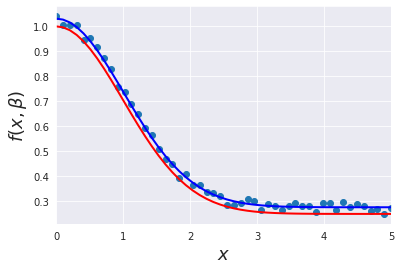

In [102]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt. show()

## 1.1.5 Пример
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:
1. f(x, b) = b_0 + b_1*x
2. f(x, b) = b_0 + b_1*x + b_2*x^2
3. f(x, b) = b_0 + b_1*ln(x)
4. f(x, b) = b_0 x^b_1

[0.27431378 0.74931392]
1.6214383992009696e-05
0.011516409329149074


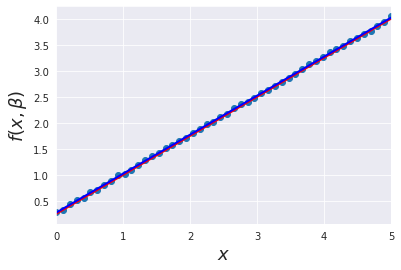

In [103]:
import scipy as sp

#решение
#1
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x
# зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек уі (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np. random.rand(len(xdata))
beta_opt, beta_cam = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
link_dev = sum(beta_cov[0])
print(link_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fresh = sum(residuals**2)
print(fresh)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[0.23994674 0.76332335 0.49699495]
0.00010786196674027509
0.011516409329149074


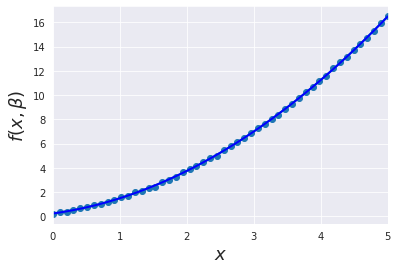

In [104]:
#решение
#2
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
# зададим массив точек хі
xdata = np. linspace(0, 5, 50)
# создаем теоретически правильные значения точек уі (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fresh)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[1.00342762 1.99923361]
7.690539854027131e-05
0.17783923168193339


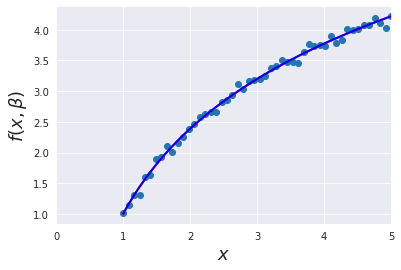

In [105]:
#решение
#3
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
# зададим массив точек xi
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек уі (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[1.00250508 1.99813157]
6.6554672986738094e-06
0.1569113505212972


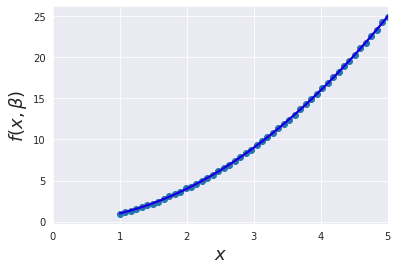

In [106]:
#решение
#4
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 * x ** b1
# зададим массив точек xi
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек уі (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

## 1.1.2 Задание
> Подставьте собственные данные и поэкспериментируйте с представленными функциями. Проанализируйте динамику изменения данных.

[0.381646   0.95021836]
6.6554672986738094e-06
0.0015776889559349857


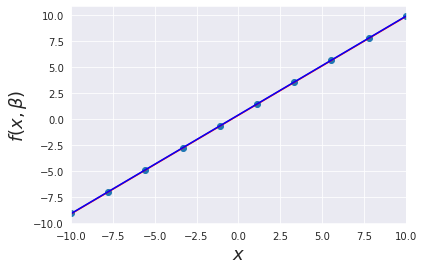

In [107]:
#решение
#1
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.35, 0.95)
beta = (0.35, 0.95)
def f(x, b0, b1):
    return b0 + b1 * x
# зададим массив точек xi
xdata = np.linspace(-10, 10, 10)
# создаем теоретически правильные значения точек уі (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np. random.rand(len(xdata))
beta_opt, beta_cam = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
link_dev = sum(beta_cov[0])
print(link_dev)

#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fresh = sum(residuals**2)
print(fresh)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r')
ax.plot(xdata, f(xdata, *beta_opt), 'b')
ax.set_xlim(-10, 10)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[0.35338794 0.95139616 0.50029194]
0.0001648523112517909
0.0015776889559349857


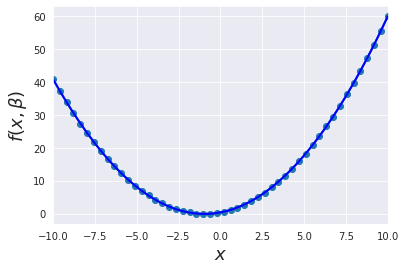

In [108]:
#решение
#2
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.35, 0.95, 0.5)
beta = (0.35, 0.95, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
# зададим массив точек хі
xdata = np. linspace(-10, 10, 50)
# создаем теоретически правильные значения точек уі (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fresh)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(-10, 10)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[1.00822273 1.99600528]
0.00017830787504970321
0.12934302348192056


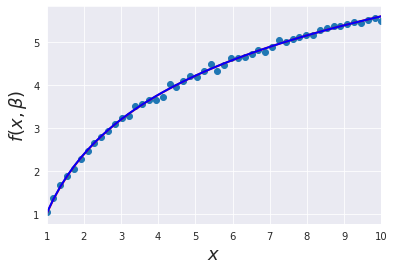

In [109]:
#решение
#3
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
# зададим массив точек xi
xdata = np.linspace(1, 10, 50)
# создаем теоретически правильные значения точек уі (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(1, 10)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

[0.99933769 2.00022388]
1.756267253087304e-07
0.14665132795803196


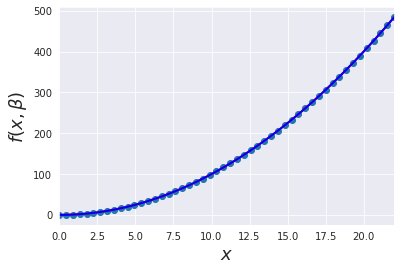

In [110]:
#решение
#4
#Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 * x ** b1
# зададим массив точек xi
xdata = np.linspace(0, 22, 50)
# создаем теоретически правильные значения точек уі (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)
#Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 22)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

## 1.2.1 Пример
> Построим простую линейную регрессию в Python с использованием библиотеки scikit-learn

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


#создадим набор данных для описания взаимосвязи между временем обучения студентов и успеваемостью
my_dict = {"Учебное время": [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,
                             2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
           "Оценка": [10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}

dataset = pd.DataFrame(my_dict)
dataset.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [112]:
print(dataset.shape)
dataset.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


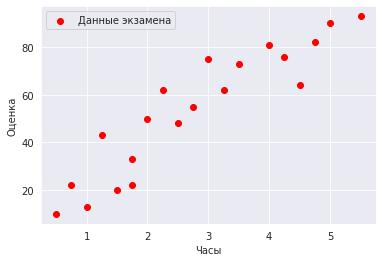

In [113]:
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color='r', label='Данные экзамена')
plt.xlabel('Часы')
plt.ylabel('Оценка')
plt.legend()
plt.show()

In [114]:
x = dataset.iloc[:,:1].values
y = dataset.iloc[:, 1].values
print(y,'\n',x)

[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93] 
 [[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]


In [115]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [116]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

5.475400029908791
[17.02706744]


In [117]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,90,90.610737
1,22,18.245701
2,93,99.124271
3,62,43.786302


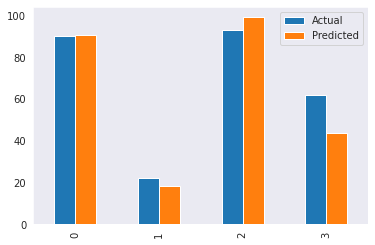

In [118]:
# визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=':', linewidth='0.5', color='black')
plt.show()

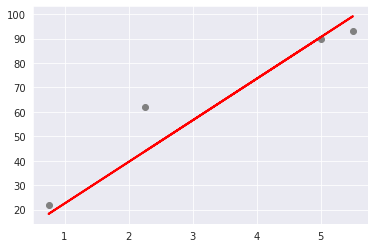

In [119]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color='red', lw=2)
plt.show()

## 1.2.1 Задание
> Постройте модель линейной регрессии для произвольных данных из двух столбцов. Для примера можно взять точечную зависимость заработной платы от опыта работы:(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv). Найдите коэффициенты линии регрессии. Постройте прогноз.

In [120]:
url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
df = pd.read_csv(url)
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [121]:
x = df.iloc[:,:1].values
y = df.iloc[:, 1].values
print(x,'\n',y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]] 
 [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [122]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

27275.400977995072
[9183.59243748]


In [123]:
y_pred = regressor.predict(X_test)
df_ = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_

,Actual,Predicted
0,37731.0,41050.789634
1,122391.0,121866.403084
2,57081.0,64928.129972
3,63218.0,63091.411484
4,116969.0,114519.529134
5,109431.0,107172.655184
6,112635.0,115437.888378
7,55794.0,64009.770728
8,83088.0,75948.440897
9,101302.0,99825.781234


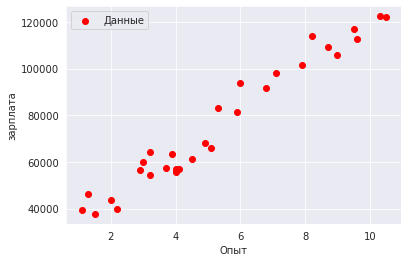

In [124]:
plt.scatter(df['YearsExperience'], df['Salary'], color='r', label='Данные')
plt.xlabel('Опыт')
plt.ylabel('зарплата')
plt.legend()
plt.show()

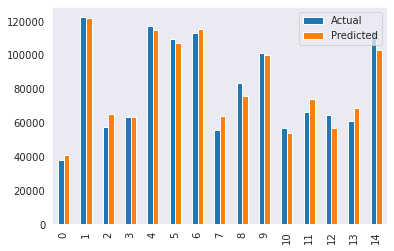

In [125]:
df_.plot(kind='bar')
plt.grid(which='major', linestyle=":", linewidth="0.5", color="black")
plt.grid(which="minor", linestyle='-', linewidth='0.5', color='black')
plt.show()

## 1.3.1. Пример
> Для решения задачи множественной регрессии можно задействовать уже известный метод numpy.linalg.lstsq

In [126]:
import numpy as np

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
X = np.transpose(X) # transpose so input vectors
X = np.c_[X, np.ones(X.shape[0])] # add bias term
linreg = np.linalg.lstsq(X, y, rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


## 1.3.2. Пример
> Для данных из предыдущей задачи построить модель множественной
линейной регрессии с использованием средств библиотеки sсikit-learn

In [127]:
#Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as seabornInstance

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y =[1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
[4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
[4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

# формируем DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np. array(X)
new_X = new_X.transpose()
df2 = pd. DataFrame(new_X)
df1 = df1.rename(columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3'}, inplace = False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join="inner")
dataset.head()

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [128]:
# изучим данные
print(dataset. shape)
dataset.describe()

(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [129]:
# разделим данные на метки и атрибуты
X = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

In [130]:
# разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [131]:
#для обучения алгоритма мы выполняем тот же код, что и раньше, используя метод fit() класса LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [132]:
#выведем коэффициенты модели
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
x1,0.223219
x2,0.136709
x3,-0.063757


In [133]:
#Чтобы сделать прогнозы на тестовых данных, выполните следующий код
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
11,5,4.119478
10,4,3.153648
21,3,3.199155
14,4,4.078333
20,1,3.258079


In [134]:
#Последний шаг - оценить производительность алгоритма. Мы сделаем это, найдя значения для MSE
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 1.327269924234307


## 1.3.1 Задание
> Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.
1. https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv

In [135]:
url = 'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
df = pd.read_csv(url)
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [136]:
x = df[['Petrol_tax', 'Paved_Highways']]
y = df['Petrol_Consumption']

dataset = pd.concat([x, y], axis=1, join="inner")
dataset.head()

,Petrol_tax,Paved_Highways,Petrol_Consumption
0,9.0,1976,541
1,9.0,1250,524
2,9.0,1586,561
3,7.5,2351,414
4,8.0,431,410


In [137]:
print(dataset. shape)
dataset.describe()

(48, 3)


,Petrol_tax,Paved_Highways,Petrol_Consumption
count,48.000000,48.000000,48.000000
mean,7.668333,5565.416667,576.770833
std,0.950770,3491.507166,111.885816
min,5.000000,431.000000,344.000000
25%,7.000000,3110.250000,509.500000
50%,7.500000,4735.500000,568.500000
75%,8.125000,7156.000000,632.750000
max,10.000000,17782.000000,968.000000


In [138]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.6, random_state=0)

In [139]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [140]:
coeff_df = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-79.994856
Paved_Highways,-0.014907


In [141]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,482.951127
4,410,625.837939
26,577,551.780760
30,571,609.325915
32,577,535.010565
37,704,617.077472
34,487,580.163382
40,587,643.104814
7,467,600.391964
10,580,543.731066


In [142]:
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 6983.398624829463


### Задание 1.3.2
> Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.

In [143]:
x = np.array([5.0, 5.2, 5.4, 5.6, 5.8, 6.0])
y = np.array([2.0, 4.0, 4.0, 3.0, 3.0, 3.0])
x_prec = np.linspace(5.0, 6.0, num=6)

In [144]:
def polinome(x, y, n):
    m = np.vstack([*[x**i for i in range(n, 0, -1)], np.ones(len(x))]).T
    s = np.linalg.lstsq(m, y, rcond=None)[0]
    return s

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

s = polinome(x, y, 1)
dataset = {'y': y, 'y_prec': [s[0]*i + s[1] for i in x]}
df = pd.DataFrame(dataset)
print(s)
df

[0.14285714 2.38095238]


,y,y_prec
0,2.0,3.095238
1,4.0,3.123810
2,4.0,3.152381
3,3.0,3.180952
4,3.0,3.209524
5,3.0,3.238095


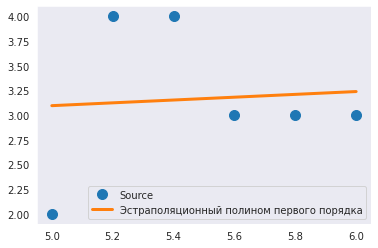

In [146]:
plt.plot(x, y, 'o', label='Source', markersize=10)
plt.grid(linestyle=":", lw=1, color="black")
plt.plot(x_prec, s[0]*x_prec + s[1], lw=3, label='Эстраполяционный полином первого порядка')
plt.legend()
plt.show()

In [147]:
s = polinome(x, y, 2)

dataset = {'y': y, 'y_prec': [s[0]* i**2 +s[1]*i + s[2] for i in x]}
df = pd.DataFrame(dataset)
print(s)
df

[  -4.46428571   49.25       -132.14285714]


,y,y_prec
0,2.0,2.500000
1,4.0,3.242857
2,4.0,3.628571
3,3.0,3.657143
4,3.0,3.328571
5,3.0,2.642857


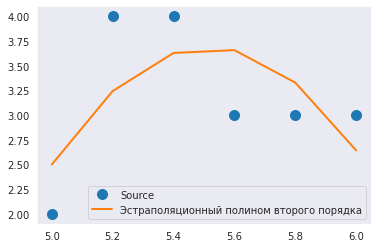

In [148]:
plt.plot(x, y, 'o', label='Source', markersize=10)
plt.grid(linestyle=":", lw=1, color="black")
plt.plot(x_prec, s[0]* x_prec**2 +s[1]*x_prec + s[2], lw=2, label='Эстраполяционный полином второго порядка')
plt.legend()
plt.show()

In [149]:
s = polinome(x, y, 3)

dataset = {'y': y, 'y_prec': [s[0]* i**3 +s[1]*i**2 + s[2]*i + s[3] for i in x]}
df = pd.DataFrame(dataset)
print(s)
df

[   18.51851852  -310.01984127  1726.06481481 -3192.58730158]


,y,y_prec
0,2.0,2.055556
1,4.0,3.865079
2,4.0,3.984127
3,3.0,3.301587
4,3.0,2.706349
5,3.0,3.087302


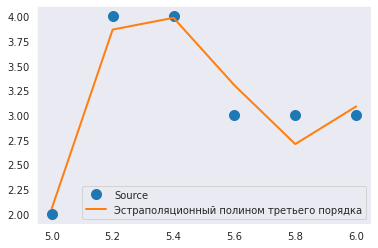

In [150]:
plt.plot(x, y, 'o', label='Source', markersize=10)
plt.grid(linestyle=":", lw=1, color="black")
plt.plot(x_prec, s[0]* x_prec**3 +s[1]*x_prec**2 + s[2]*x_prec + s[3] , lw=2, label='Эстраполяционный полином третьего порядка')
plt.legend()
plt.show()